In [175]:
import sys
import os
import numpy as np
from IPython.display import HTML
from GetEncryptedData import getModuleData
from importlib import reload
import pandas as pd
import matplotlib.pyplot as plt
from InstructorFiles.Functions.Parameters import parameters

<h1>INITIAL DATA! DO NOT OVERWRITE! Make copies of them to work with.</h1>

In [121]:
def save_video(video_data):
    with open('unencryptedVideo2.mp4', 'wb') as videoFile:
        encrypted_video = videoFile.write(bytes(video_data))
        videoFile.close()
        
def frequency_analysis_dict(value):
    frequency = dict()
    for char in value:
        if char not in frequency:
            frequency[char] = int(1)
        else:
            frequency[char] = int(frequency[char]+1)
    return sorted(frequency.items(), reverse=true, key=lambda item: item[1])

In [122]:
encrypted_video = None
encrypted_text = None
with open('InstructorFiles/Functions/Videos/encryptedVideos/encryptedVideo2.mp4', 'rb') as videoFile:
    encrypted_video = list(videoFile.read())

with open('InstructorFiles/Functions/Texts/text2Encrypted.txt', 'rb') as textData:
    encrypted_text = list(textData.read())

In [167]:
#Initial video. Go ahead and test it, you'lll find the encryption has left it unplayable...
HTML("""
    <video alt="Video1" controls>
        <source src="InstructorFiles/Functions/Videos/encryptedVideos/encryptedVideo2.mp4" type="video/mp4">
    </video>
""")

<h1>Lesson 2:The Kasiski Mentality</h2>

<p>Now that we got the first piece of Dr. Encrypto's message, the boys over on the field have received his next message that he is sending to us. After some reconnaissance, we've determined that the message was encrypted with the Beaufort cipher. With time quickly running out to save the world, you head to your office and begin researching everything you can about the Beaufort cipher</p>

<h3>Beaufort Cipher explained</h3>
<p>The Beaufort cipher is a lot easier understood after first discussing the Vignere ciphers. Vignere ciphers work by choosing some cipher keyword and then mapping that keyword across the entire plaintext. So, for example, suppose our keyword is simply "KEY" and the plaintext is "ENCRYPTIONISFUN". We would map the keyword across the plaintext such that the key is repeated as necessary across the plaintext. We can model this relationship with</p>
<p>$ENCRYPTIONISFUN$</p>
<p>$KEYKEYKEYKEYKEY$</p>
<p>To encrypt a text, we add the position of the plaintext's letter $c$ to the position of the accompanying keyword's letter position $b$ and mod out the answer by the size of the alphabet $p$. This gives us the equation for the ciphertext's letter $d$ where $d = c+b$ $mod{p}$ So, for example, encrypting the first letter of the plaintext would be done by performing $4+10$ $mod$ $26$, leaving us with $14$. For decryption, we would perform the same process on the ciphertext.</p>
<p>The Beaufort cipher works almost exactly like the Vignere cipher, only we subtract the key character's position from the plaintext character's position. Dr. Decrypto supposedly chose this cipher since <i>apparently</i> no one expect such a "new" and "unknown" cipher.</p>
<p>To show Decrypto what's for, test your understanding of Beaufort by decrypting the value $VZHPZWHGOYCYWV$ with the key $TROUT$. You can test your answer py running the function following this markdown block.</p>

In [178]:
parameters.check_beaufort_decypher('FOLLOWTHECLUES')

<h3>The Kasiski Test</h3>
<p>So now we know how to encrypt and decrypt with the Beaufort cipher, but there's just one problem: we have no idea what the encryption key is! The key could be anything and unlike the Alberti cipher, we cannot brute force our way to an answer since we know absolutely nothing about the key. Frequency analysis won't give us anything useful either since multiple letters can map to the same encryption value (go ahead, check yourself). Thankfully, there are ways to still crack this cipher using the Kasiski test.</p>
<p>The Kasiski test works using the following assumptions:</p>
<ul>
    <li>When a string of characters repeatedly appears in a ciphertext, assume that the distance between the occurences of the string is a multiple of the key length.</li>
    <li>Not every repeating pattern is indicative of a key's length, but the more times the pattern repeats, the less likely the pattern repetition has occurred by mere chance.</li>
    <li>The most likely key length is the greatest common divisor of all the distances between common repeating strings, but it is possible that the key length could be any of the common factors of all the distances.</li>
</ul>

Using the Kasiski test, we could find the length of the encryption key used in the Beaufort cipher. Using this length, we could create frequency tables for each index of the key and use this to find what the likely letter values are of the key so we can decrypt a ciphertext

<h1>Crack the cipher!</h1>
<p>You now know everything you need to know to crack this cipher. Get to it! Compartmentalize the procedure we discussed and write functions for each step! Remember, our data is encoded at the byte-level, so there are 256 members of our alphabet. Use this fact when finding your key and decrypting the text and video. Call the save_video function with your decrypted video so that it can become playable when you think you have cracked the code. Good luck!</p>

<h3>Sample cipher crack procedure</h3>

In [123]:
video = encrypted_video
text = encrypted_text

In [124]:
frequency_analysis_dict(encrypted_text)

[(220, 21),
 (221, 21),
 (222, 20),
 (216, 18),
 (218, 16),
 (217, 15),
 (224, 15),
 (227, 14),
 (207, 14),
 (231, 13),
 (230, 13),
 (234, 12),
 (213, 11),
 (226, 11),
 (205, 11),
 (211, 11),
 (215, 10),
 (212, 9),
 (219, 8),
 (210, 8),
 (223, 8),
 (235, 8),
 (204, 7),
 (206, 7),
 (228, 7),
 (232, 5),
 (214, 5),
 (251, 4),
 (238, 4),
 (209, 4),
 (225, 4),
 (233, 4),
 (202, 3),
 (208, 2),
 (252, 2),
 (7, 2),
 (2, 2),
 (30, 1),
 (23, 1),
 (3, 1),
 (203, 1),
 (31, 1),
 (253, 1),
 (9, 1),
 (21, 1),
 (10, 1),
 (236, 1),
 (200, 1)]

<h3>Sample Cipher Crack Procedure: </h3>

In [125]:
# we will make use of the kasiski test to find out what the key used for the beaufort cypher is. 

In [126]:
#First, we need to find the common n-grams (i.e common number sequences in the byte list
def filter_common_ngrams(pair):
    if pair[1][0] >1:
        return True
    return False

def n_grams(data, size):
    ngram_dict = dict()
    # start index at 0, continune until we go through all the words
    i = 0
    while i<len(data):
        cur_n_gram = data[i:i+size]
        if(len(cur_n_gram) == size):
            if str(cur_n_gram) in ngram_dict:
                ngram_dict[str(cur_n_gram)][1].append(i)
                ngram_dict[str(cur_n_gram)] = (ngram_dict[str(cur_n_gram)][0]+1,ngram_dict[str(cur_n_gram)][1])
            else:
                new_list = list()
                new_list.append(i)
                ngram_dict[str(cur_n_gram)] = (1, new_list)
        i = i+size
    return dict(filter(filter_common_ngrams, ngram_dict.items()))

In [127]:
#Gather a list of common ngrams
cur_ngram_length = 3
no_ngram_amt = 0
common_ngrams = list()
while no_ngram_amt < 5:
    cur_ngram=n_grams(text, cur_ngram_length)
    if len(cur_ngram.keys())==0:
        no_ngram_amt=no_ngram_amt+1
        cur_ngram_length=cur_ngram_length+1
        continue
    if no_ngram_amt!=0 and len(cur_ngram.keys())!=0:
        no_ngram_amt=0
    common_ngrams.append(cur_ngram)
    cur_ngram_length=cur_ngram_length+1

In [128]:
def beaufort_decypher(data, key):
    # Since we are working with bytes, do subtraction modulo 256 for the key and data to be encoded
    value = list()
    cur_key_pos = 0
    for byte in data:
        value.append(int(mod(key[cur_key_pos]-byte, 256)))
        if(cur_key_pos == len(key)-1):
            cur_key_pos=0
        else:
            cur_key_pos=cur_key_pos+1
    return value

In [129]:
#list of all common ngrams, the key is a string representation of the ngram and the value is a set where the first item is the number of times the ngram occurs and the second item indicated the starting indices of the ngram in the string
common_ngrams

[{'[202, 221, 218]': (2, [150, 165]),
  '[222, 224, 207]': (2, [156, 231]),
  '[204, 217, 211]': (2, [258, 333])},
 {'[205, 227, 226, 216]': (2, [28, 128])}]

In [130]:
# finds the GCD of a set of numbers
def gcd_set(nums):
    print(nums)
    if len(nums) == 2:
        return gcd(nums[0], nums[1])
    else:
        return gcd(nums[0], gcd_set(nums[1:len(nums)]))

In [131]:
key_length = int(gcd_set([128-28,333-258,231-156,165-150]))

[100, 75, 75, 15]
[75, 75, 15]
[75, 15]


In [132]:
key_length

5

In [133]:
# make a dictionary where the key is the letter position in the keyword and the value is the current byte value at that position
key_letter_positions = dict()
cur_pos=0
for character in text:
    if cur_pos not in key_letter_positions:
        new_list = list()
        new_list.append(character)
        key_letter_positions[cur_pos] = new_list
    else:
        key_letter_positions[cur_pos].append(character)
    if cur_pos == key_length-1:
        cur_pos=0
    else:
        cur_pos=cur_pos+1

Possible values for position  0 :
[222]
C
[207]
4
[218]
?
[213]
:
[209]
6



Possible values for position  1 :
[231]
L
[221]
B
[216]
=
[217]
>
[222]
C



Possible values for position  2 :
[234]
O
[224]
E
[219]
@
[218]
?
[221]
B



Possible values for position  3 :
[220]
A
[205]
2
[210]
7
[207]
4
[211]
8



Possible values for position  4 :
[215]
<
[230]
K
[216]
=
[227]
H
[220]
A





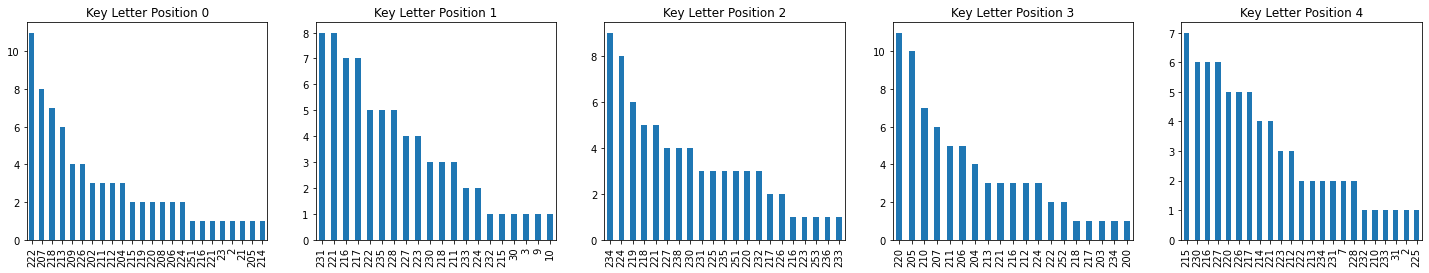

In [162]:
#make a chart for each position in the possible key
%matplotlib inline
ys = list()
xs = list()
for i in range(0, key_length):
    cur_table = frequency_analysis_dict(list(key_letter_positions.values())[i])
    print('Possible values for position ',i,':')
    y_ax = [y[1] for y in cur_table]
    x_ax = [x[0] for x in cur_table]
    for i in range(0,5):
        print(([int(mod(cur_table[i][0], 256))]))
        print(str(bytes([int(mod(cur_table[i][0]+101, 256))]), 'utf-8'))
    xs.append(x_ax)
    ys.append(y_ax)
    print('\n\n')
    
fig, axs = plt.subplots(ncols=key_length, figsize=(25, 4))
for i in range(0, key_length):
    pd.Series(ys[i], index=xs[i]).plot(kind='bar', ax=axs[i])
    axs[i].set_title('Key Letter Position {}'.format(i))

In [146]:
key=list(bytes('CLOAK', 'utf-8'))

In [147]:
#check if key works
str(bytes(beaufort_decypher(text, key)),'utf-8')

'Helloleaderthisistoinformyouthatourenemieshavedeclaredthattheyarenevergonnagiveuptrackingyoudown.Thisisunfortunatebutrestassuredthatwearenevergonnaletyoudownordesertyouinthismoment,Itisimperitivethatwecometogetheronafullcommitmentinordertoensurethesuccessofourplan,whichisREDACTED.BTWIwillsendthismessageovertotheagencytryingtofoilyourplotjusttomesswiththemlol'

<h1>Test your decrypted video here!</h1>

In [148]:
save_video(beaufort_decypher(video, key))

In [150]:
HTML("""
    <video alt="Video1" controls>
        <source src="unencryptedVideo2.mp4" type="video/mp4">
    </video>
""")